# Pair Programming Intro Machine Learning

1. Buscar un conjunto de datos a analizar:

- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [1]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import seaborn as sns

import sidetable as stb
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

plt.rcParams["figure.figsize"] = (20,15)

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

sys.path.append("../../")
from src import funciones as fun
from src import variables as var

## 1. Realizamos una primera aproximación a nuestros datos

In [2]:
# Creamos nuestro dataframe:
df = pd.read_csv("../archivos/cost-of-living_v2.csv")

In [3]:
df.sample(5)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
3514,Tivat,Montenegro,7.90,42.15,5.27,2.63,2.63,1.98,2.11,1.11,1.03,0.77,1.44,2.24,6.75,5.33,7.95,0.90,1.34,1.05,1.32,0.61,0.57,0.76,0.66,5.27,0.82,2.00,3.79,1.74,28.98,1.19,1.05,5.27,1.62,23709.27,34773.59,113.20,0.13,25.68,39.52,14.05,4.21,395.15,11591.20,51.37,44.78,80.35,115.91,572.97,441.07,1159.12,835.47,2660.71,2318.24,724.45,4.99,0
2841,Swidnica,Poland,7.89,25.92,5.63,2.25,1.92,2.48,2.03,1.58,0.71,0.79,0.83,1.89,6.31,4.51,11.27,1.29,2.39,2.95,4.73,1.43,1.08,1.45,0.51,4.28,1.35,1.35,4.51,0.90,22.54,2.03,0.23,NaN,1.57,18480.75,23664.37,151.66,0.06,12.96,39.06,10.52,9.01,NaN,NaN,33.80,20.28,58.60,90.15,315.52,281.72,619.78,619.78,1498.74,1464.94,901.50,8.00,0
978,Sao Jose do Rio Preto,Brazil,3.83,15.33,4.50,0.96,2.39,1.01,0.72,0.35,0.92,0.77,1.60,2.22,5.36,4.02,6.32,1.34,0.94,0.89,1.12,0.84,0.77,0.61,0.48,4.98,0.72,1.53,1.92,0.79,19.16,NaN,NaN,NaN,1.18,13890.49,25865.04,108.57,NaN,18.20,21.08,NaN,2.87,172.43,4215.04,44.71,41.51,86.22,47.90,191.59,172.43,287.39,287.39,NaN,NaN,258.65,10.00,0
1292,Valparaiso,Chile,9.05,45.27,6.23,3.40,3.96,2.31,1.36,0.96,0.93,0.76,1.16,2.81,8.30,5.21,8.40,1.68,1.40,1.58,1.82,0.94,1.18,1.05,1.09,5.09,1.25,1.96,4.41,0.68,24.61,0.79,1.13,9.00,1.21,14286.93,14677.42,98.97,0.06,28.49,36.43,28.30,5.66,305.60,6403.96,36.22,28.06,50.93,73.85,370.87,313.15,679.12,584.32,1634.41,1464.06,502.55,5.80,0
3038,Samkir,Azerbaijan,1.76,14.71,11.76,1.18,1.18,2.94,0.41,0.12,0.59,0.41,1.53,1.06,1.76,2.06,5.88,0.94,1.64,0.94,1.62,0.47,0.26,0.29,0.44,5.88,1.18,1.76,2.35,0.18,5.88,1.18,0.29,1.76,0.59,NaN,NaN,30.00,0.02,17.65,17.65,11.76,1.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382.35,4.00,0


### Descripción de las columnas:
- city : Name of the city
- country: Name of the country
- x1 : Meal, Inexpensive Restaurant (USD)
- x2 : Meal for 2 People, Mid-range Restaurant, Three-course (USD)
- x3 : McMeal at McDonalds (or Equivalent Combo Meal) (USD)
- x4 : Domestic Beer (0.5 liter draught, in restaurants) (USD)
- x5 : Imported Beer (0.33 liter bottle, in restaurants) (USD)
- x6 : Cappuccino (regular, in restaurants) (USD)
- x7 : Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)
- x8 : Water (0.33 liter bottle, in restaurants) (USD)
- x9 : Milk (regular), (1 liter) (USD)
- x10 : Loaf of Fresh White Bread (500g) (USD)
- x11 : Rice (white), (1kg) (USD)
- x12 : Eggs (regular) (12) (USD)
- x13 : Local Cheese (1kg) (USD)
- x14 : Chicken Fillets (1kg) (USD)
- x15 : Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)
- x16 : Apples (1kg) (USD)
- x17 : Banana (1kg) (USD)
- x18 : Oranges (1kg) (USD)
- x19 : Tomato (1kg) (USD)
- x20 : Potato (1kg) (USD)
- x21 : Onion (1kg) (USD)
- x22 : Lettuce (1 head) (USD)
- x23 : Water (1.5 liter bottle, at the market) (USD)
- x24 : Bottle of Wine (Mid-Range, at the market) (USD)
- x25 : Domestic Beer (0.5 liter bottle, at the market) (USD)
- x26 : Imported Beer (0.33 liter bottle, at the market) (USD)
- x27 : Cigarettes 20 Pack (Marlboro) (USD)
- x28 : One-way Ticket (Local Transport) (USD)
- x29 : Monthly Pass (Regular Price) (USD)
- x30 : Taxi Start (Normal Tariff) (USD)
- x31 : Taxi 1km (Normal Tariff) (USD)
- x32 : Taxi 1hour Waiting (Normal Tariff) (USD)
- x33 : Gasoline (1 liter) (USD)
- x34 : Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)
- x35 : Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)
- x36 : Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
- x37 : 1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)
- x38 : Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)
- x39 : Fitness Club, Monthly Fee for 1 Adult (USD)
- x40 : Tennis Court Rent (1 Hour on Weekend) (USD)
- x41 : Cinema, International Release, 1 Seat (USD)
- x42 : Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)
- x43 : International Primary School, Yearly for 1 Child (USD)
- x44 : 1 Pair of Jeans (Levis 501 Or Similar) (USD)
- x45 : 1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)
- x46 : 1 Pair of Nike Running Shoes (Mid-Range) (USD)
- x47 : 1 Pair of Men Leather Business Shoes (USD)
- x48 : Apartment (1 bedroom) in City Centre (USD)
- x49 : Apartment (1 bedroom) Outside of Centre (USD)
- x50 : Apartment (3 bedrooms) in City Centre (USD)
- x51 : Apartment (3 bedrooms) Outside of Centre (USD)
- x52 : Price per Square Meter to Buy Apartment in City Centre (USD)
- x53 : Price per Square Meter to Buy Apartment Outside of Centre (USD)
- x54 : Average Monthly Net Salary (After Tax) (USD)
- x55 : Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
- data_quality : 0 if Numbeo considers that more contributors are needed to increase data quality, else 1

In [4]:
fun.exploracion(df)

.............................................
En el dataframe hay 4956 filas y 58 columnas.
.............................................
5 filas aleatorias:


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
257,Hamburg,Germany,14.75,63.22,9.48,4.74,4.21,3.59,2.80,2.30,1.18,2.38,2.27,3.75,12.11,9.00,14.18,2.97,1.84,2.3,2.06,1.46,0.98,1.22,0.71,7.38,0.72,1.43,7.90,3.44,96.94,4.32,2.07,35.72,2.24,27882.10,36598.08,287.14,0.12,37.75,55.36,31.48,15.81,611.17,24687.75,92.23,44.37,108.62,151.80,1111.22,844.66,2101.64,1610.25,9257.90,5938.61,3164.03,1.98,1
4112,Hwange,Zimbabwe,9.25,20.00,6.75,1.50,NaN,2.25,0.50,NaN,1.75,1.15,1.45,2.00,12.00,3.00,7.50,2.00,1.30,1.4,1.20,1.10,0.90,0.40,1.10,8.00,1.00,3.00,NaN,NaN,NaN,2.50,0.48,NaN,1.43,NaN,NaN,80.00,0.13,55.00,NaN,NaN,9.50,178.50,NaN,25.00,15.00,25.00,55.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4694,Mendrisio,Switzerland,26.18,213.69,16.03,4.81,5.08,4.11,4.01,3.21,1.58,NaN,5.29,5.45,NaN,13.36,42.74,2.67,2.14,NaN,4.81,2.14,2.14,NaN,1.76,10.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.86,NaN,NaN,267.11,NaN,42.68,NaN,NaN,NaN,NaN,NaN,37.40,50.22,200.33,191.25,988.32,908.18,1709.52,1575.96,9616.05,7212.04,3338.91,1.40,0
375,Srinagar,India,2.46,15.05,5.53,1.35,NaN,1.11,0.32,0.20,0.55,0.51,0.54,0.90,3.07,3.28,5.04,0.61,1.02,1.8,0.49,0.37,0.49,0.23,0.34,8.29,1.83,3.68,4.61,0.37,9.21,NaN,0.12,NaN,1.30,15966.29,17194.46,26.71,0.01,8.83,12.28,6.14,3.68,51.17,810.60,25.18,30.70,46.06,42.99,116.68,70.62,225.17,122.82,1109.84,362.63,429.86,9.62,0
3135,Cakovec,Croatia,8.03,30.71,4.37,1.95,2.37,1.40,1.68,1.26,0.98,0.97,1.68,1.97,7.19,5.58,8.45,1.12,1.44,1.4,2.00,0.47,0.70,0.91,0.98,5.23,1.34,2.00,4.05,NaN,66.31,2.09,0.63,2.79,1.42,23033.75,24008.90,139.99,0.12,21.41,41.88,7.91,6.28,120.99,5189.17,66.42,21.34,69.93,73.40,327.67,282.19,577.51,420.13,2005.85,1550.82,854.22,4.50,0


.............................................
Los tipos de data por columna del dataframe son:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
index,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


.............................................
La cantidad de nulos por columna del dataframe son:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
index,city,country,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0,0,428,451,334,496,440,344,445,316,378,413,343,507,478,558,566,372,381,441,469,437,433,501,388,462,721,655,490,1506,2166,873,1022,1396,588,1058,995,488,1201,349,1375,2400,475,1132,1681,479,617,503,553,1363,1431,1480,1512,2227,2303,1432,1006,0


.............................................
El porcentaje de nulos por columna del dataframe son:


city             0.000000
country          0.000000
x1               8.635997
x2               9.100081
x3               6.739306
x4              10.008071
x5               8.878128
x6               6.941082
x7               8.979015
x8               6.376110
x9               7.627119
x10              8.333333
x11              6.920904
x12             10.230024
x13              9.644875
x14             11.259080
x15             11.420500
x16              7.506053
x17              7.687651
x18              8.898305
x19              9.463277
x20              8.817595
x21              8.736885
x22             10.108959
x23              7.828894
x24              9.322034
x25             14.548023
x26             13.216303
x27              9.887006
x28             30.387409
x29             43.704600
x30             17.615012
x31             20.621469
x32             28.167877
x33             11.864407
x34             21.347861
x35             20.076675
x36              9.846651
x37         

.............................................
No hay filas duplicadas.
.............................................
Los principales estadísticos de las columnas numéricas son:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,4578.000000,4543.000000,4613.00000,4449.000000,4478.000000,4398.000000,4390.000000,4584.000000,4575.000000,4515.000000,4487.000000,4519.000000,4523.000000,4455.000000,4568.000000,4494.000000,4235.000000,4301.000000,4466.000000,3450.000000,2790.000000,4083.000000,3934.000000,3560.000000,4368.000000,3898.000000,3961.000000,4468.000000,3755.000000,4607.000000,3581.000000,2556.000000,4481.000000,3824.000000,3275.000000,4477.000000,4339.000000,4453.000000,4403.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
mean,10.346705,43.357811,6.929697,3.379774,3.942465,2.754952,1.523873,1.119804,1.148554,1.612855,2.18726,2.352544,9.498341,7.169729,11.722251,2.749391,1.554691,2.361697,2.559650,1.566477,1.522472,1.227113,0.986806,8.642628,1.658430,2.310500,6.285253,1.517145,43.981717,2.765378,1.231490,17.175180,1.361664,23781.480667,23878.492083,136.254584,0.136008,146.323369,36.849994,15.780137,8.366133,489.580267,8770.865915,52.617391,35.039650,76.998309,85.976357,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,7.157058,25.528312,2.704435,2.105957,2.100146,1.358821,0.907025,0.755257,0.517186,1.089164,1.63280,1.078669,4.930385,4.450099,7.284523,1.877756,0.831027,1.697792,1.810338,1.227042,1.123391,0.733580,0.678959,4.646069,0.912728,1.196492,4.446120,1.327994,36.867305,2.230275,0.853241,15.666538,0.495643,9057.962571,8770.285094,85.048918,0.123784,7159.592660,22.929434,11.157743,4.132562,515.000774,8030.169251,25.267695,15.173614,33.252260,40.434524,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,0.450000,3.250000,1.080000,0.330000,0.310000,0.220000,0.110000,0.070000,0.260000,0.050000,0.25000,0.100000,0.900000,1.220000,1.470000,0.270000,0.220000,0.200000,0.120000,0.110000,0.110000,0.080000,0.110000,0.360000,0.250000,0.360000,0.450000,0.000000,0.000000,0.140000,0.090000,0.160000,0.030000,0.000000,3212.850000,6.070000,0.000000,1.360000,0.000000,0.000000,0.680000,4.070000,0.000000,4.070000,0.000000,8.030000,7.600000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,4.310000,22.440000,4.980000,1.600000,2.200000,1.580000,0.770000,0.480000,0.830000,0.780000,1.05000,1.570000,6.150000,4.012500,7.240000,1.460000,1.100000,1.210000,1.190000,0.740000,0.740000,0.710000,0.490000,5.270000,0.990000,1.490000,3.050000,0.480000,18.030000,1.080000,0.530000,4.790000,1.080000,18595.955000,19365.840000,68.780000,0.050000,18.830000,22.540000,8.000000,4.810000,136.622500,3161.240000,35.000000,26.340000,61.900000,58.430000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,9.600000,40.000000,6.990000,3.000000,3.690000,2.630000,1.480000,1.050000,1.045000,1.320000,1.69000,2.140000,8.800000,6.140000,10.250000,2.270000,1.420000,1.890000,2.140000,1.210000,1.170000,1.050000,0.760000,7.805000,1.430000,2.110000,5.270000,1.160000,35.000000,2.500000,1.130000,12.640000,1.280000,22920.730000,22537.500000,128.085000,0.100000,34.440000,33.180000,13.550000,8.190000,302.950000,6324.790000,48.040000,33.130000,75.000000,84.260000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,15.000000,60.000000,8.500000,5.000000,5.270000,3.770000,2.110000,1.580000,1.320000,2.200000,2.74000,2.970000,11.837500,9.210000,14.310000,3.590000,1.820000,3.060000,3.570000,2.100000,2.110000,1.630000,1.390000,11.440000,2.140000,2.870000,8.430000,2.207500,60.517500,3.690000,1.710000,25.577500,1.710000,26821.052500,26944.410000,185.000000,0.190000,57.950000,45.000000,21.070000,

.............................................
Los principales estadísticos de las columnas categóricas son:


,city,country
count,4956,4956
unique,4898,215
top,Victoria,United States
freq,4,1073


.............................................


In [5]:
# Volvemos a fijarnos en los nulos, esta vez utilizando la libreria 'sidetable'
df.stb.missing().T

,x40,x53,x52,x29,x43,x51,x28,x50,x54,x49,x32,x39,x48,x37,x42,x34,x31,x55,x35,x30,x25,x26,x45,x33,x15,x14,x47,x12,x46,x22,x4,x27,x36,x44,x13,x41,x19,x24,x2,x7,x18,x5,x20,x21,x1,x10,x23,x17,x9,x16,x38,x6,x11,x3,x8,city,country,data_quality
missing,2400.00000,2303.000000,2227.000000,2166.0000,1681.000000,1512.000000,1506.000000,1480.000000,1432.00000,1431.000000,1396.000000,1375.000000,1363.000000,1201.000000,1132.000000,1058.000000,1022.000000,1006.000000,995.000000,873.000000,721.000000,655.000000,617.000000,588.000000,566.0000,558.00000,553.000000,507.000000,503.000000,501.000000,496.000000,490.000000,488.000000,479.000000,478.000000,475.000000,469.000000,462.000000,451.000000,445.000000,441.000000,440.000000,437.000000,433.000000,428.000000,413.000000,388.000000,381.000000,378.000000,372.000000,349.000000,344.000000,343.000000,334.000000,316.00000,0.0,0.0,0.0
total,4956.00000,4956.000000,4956.000000,4956.0000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.0000,4956.00000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.00000,4956.0,4956.0,4956.0
percent,48.42615,46.468927,44.935432,43.7046,33.918483,30.508475,30.387409,29.862793,28.89427,28.874092,28.167877,27.744149,27.502018,24.233253,22.841001,21.347861,20.621469,20.298628,20.076675,17.615012,14.548023,13.216303,12.449556,11.864407,11.4205,11.25908,11.158192,10.230024,10.149314,10.108959,10.008071,9.887006,9.846651,9.665052,9.644875,9.584342,9.463277,9.322034,9.100081,8.979015,8.898305,8.878128,8.817595,8.736885,8.635997,8.333333,7.828894,7.687651,7.627119,7.506053,7.041969,6.941082,6.920904,6.739306,6.37611,0.0,0.0,0.0


### Selección de la variable dependiente:
Tras un primer análisis de los datos, decidimos que queremos utilizar la columna x36, referente al precio medio de los gastos básicos (como luz, gas, agua) en dólares, como variable a predecir en función del pais en que os encontremos y el precio medio de otros bienes y servicios.

In [6]:
# Dado que 'x36' es nuestra variable dependiente, eliminamos los nulos
df.dropna(subset= ["x36"], how = "any", inplace = True)

Como tenemos un gran número de columnas numércias, comenzamos analizando las relaciones entre ellas para comprobar si tenemos columnas redundantes que puedan obviarse y quedarnos así con un dataframe simplificado.

In [7]:
numericas = df.select_dtypes(include=np.number)

In [8]:
numericas.corr()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
x1,1.000000,0.793067,0.702972,0.672706,0.616775,0.641937,0.748429,0.706401,0.130772,0.629633,0.542652,0.670373,0.430272,0.673034,0.518970,0.432971,0.359117,0.515097,0.582019,0.509993,0.534871,0.537372,0.577400,0.354889,0.464019,0.315918,0.629087,0.590772,0.524126,0.533469,0.512756,0.661051,0.404401,0.193902,0.150376,0.538796,0.306065,-0.009068,0.365832,0.327693,0.712263,0.644640,0.505923,0.393818,0.251911,0.259979,0.501904,0.625690,0.666458,0.562302,0.634436,0.182856,0.267215,0.715219,-0.379834,0.059248
x2,0.793067,1.000000,0.725427,0.704250,0.647857,0.661170,0.773106,0.750879,0.224596,0.625616,0.509242,0.693964,0.460748,0.665023,0.571047,0.424184,0.383001,0.474685,0.561049,0.478052,0.501694,0.568842,0.562961,0.385529,0.470449,0.312597,0.651505,0.632375,0.565018,0.586219,0.562998,0.703807,0.444638,0.236166,0.170863,0.536971,0.309869,0.008512,0.432064,0.386473,0.755417,0.617030,0.494902,0.451465,0.286285,0.308086,0.552517,0.626246,0.652806,0.594541,0.639911,0.235058,0.334448,0.699462,-0.401643,0.129766
x3,0.702972,0.725427,1.000000,0.655917,0.591547,0.594806,0.747029,0.729957,0.236495,0.586995,0.432757,0.670602,0.468652,0.635208,0.570929,0.388944,0.383320,0.414783,0.472605,0.442990,0.455905,0.520264,0.479774,0.338051,0.403531,0.297300,0.559199,0.541751,0.468001,0.581620,0.578318,0.675928,0.456381,0.231733,0.208578,0.484908,0.299176,0.048766,0.384797,0.376916,0.686141,0.524782,0.387196,0.442963,0.298761,0.302069,0.506040,0.512442,0.531041,0.456783,0.503615,0.240136,0.319607,0.605995,-0.378714,0.080579
x4,0.672706,0.704250,0.655917,1.000000,0.820262,0.672518,0.687942,0.658043,0.166644,0.595252,0.499154,0.630086,0.390576,0.611538,0.514452,0.425193,0.339110,0.465992,0.503315,0.449934,0.479557,0.522810,0.544444,0.476038,0.588439,0.439629,0.642997,0.579321,0.538540,0.515996,0.470654,0.648716,0.401680,0.182547,0.115337,0.474442,0.248001,0.010189,0.331939,0.306111,0.702986,0.577730,0.429358,0.332848,0.195654,0.189772,0.443443,0.592577,0.624692,0.522299,0.583509,0.228064,0.312532,0.687621,-0.418547,0.093615
x5,0.616775,0.647857,0.591547,0.820262,1.000000,0.716973,0.592635,0.563305,0.193113,0.638318,0.547484,0.569038,0.364554,0.578501,0.427615,0.500964,0.309506,0.541119,0.537257,0.513378,0.531569,0.530929,0.608040,0.574647,0.651225,0.535437,0.592432,0.494657,0.466968,0.450026,0.398570,0.549494,0.227960,0.149678,0.076960,0.404926,0.220404,-0.004861,0.317188,0.259827,0.636547,0.559363,0.442948,0.185001,0.197311,0.170124,0.380793,0.614857,0.636848,0.550304,0.610758,0.231791,0.301997,0.672342,-0.324070,0.076916
x6,0.641937,0.661170,0.594806,0.672518,0.716973,1.000000,0.617295,0.623346,0.248719,0.722510,0.620701,0.615507,0.398972,0.619706,0.490718,0.603595,0.345914,0.625939,0.625356,0.588950,0.608363,0.584720,0.691094,0.572614,0.561189,0.426463,0.551435,0.533834,0.493847,0.434561,0.467441,0.558959,0.170986,0.190258,0.090100,0.450255,0.230408,0.016698,0.348160,0.308517,0.716866,0.627925,0.543291,0.189680,0.215819,0.221235,0.424695,0.653177,0.683105,0.600512,0.656102,0.208082,0.275996,0.751458,-0.319266,0.049533
x7,0.748429,0.773106,0.747029,0.687942,0.592635,0.617295,1.000000,0.864659,0.134803,0.615359,0.470417,0.703807,0.471779,0.696826,0.612036,0.373418,0.404229,0.441369,0.524384,0.448731,0.476088,0.505351,0.470986,0.261893,0.375690,0.237312,0.603558,0.619918,0.493267,0.571467,0.580037,0.718280,0.555203,0.213808,0.174829,0.609516,0.324952,0.016931,0.354323,0.338096,0.716848,0.557934,0.437416,0.506058,0.260773,0.281328,0.540672,0.546954,0.585171,0.505149,0.559294,0.215610,0.293662,0.666546,-0.462218,0.073460
x8,0.706401,0.750879,0.729957,0.658043,0.563305,0.623346,0.864659,1.000000,0.118451,0.610187,0.458389,0.669826,0.449626,0.659187,0.609443,0.389827,0.378957,0.436068,0.515605,0.457312,0.467330,0.530149,0.497823,0.27684

In [9]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

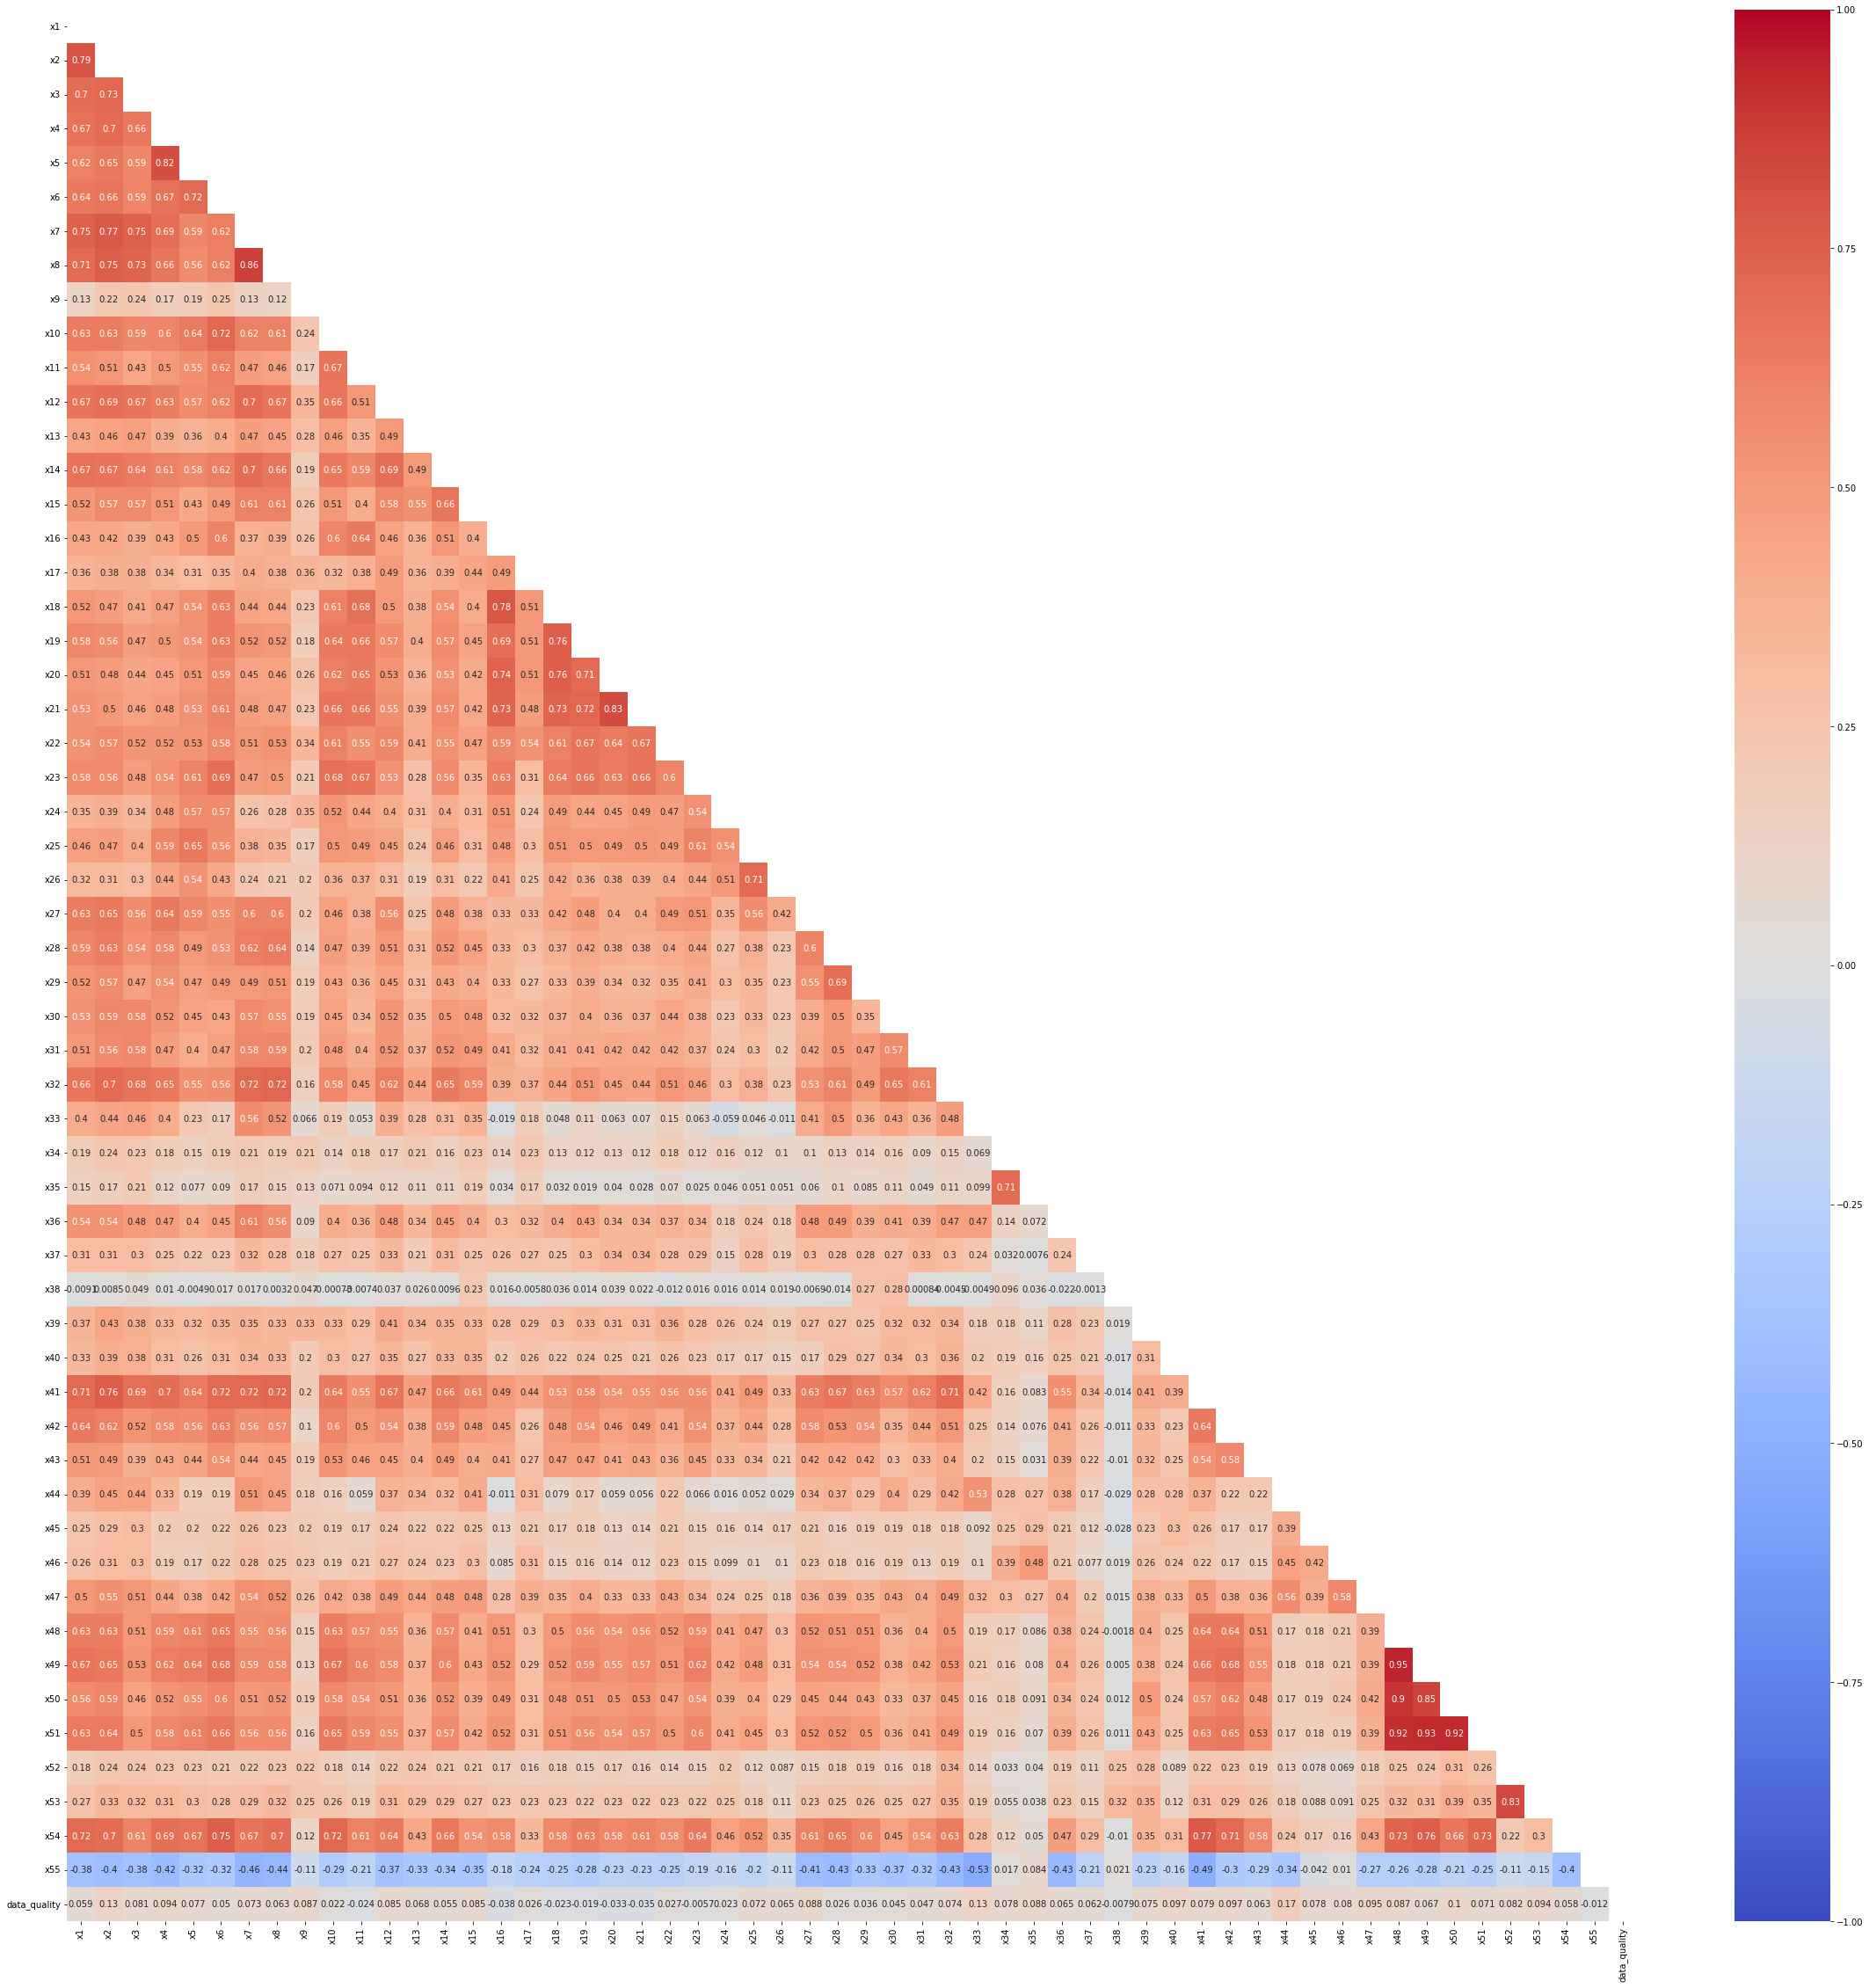

In [10]:
plt.figure(figsize=(40,40))
sns.heatmap(numericas.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1);

Tras analizar de manera detenida las correlaciones entre todas las variables decidimos hacer una lista con todas las columnas que decidimos eliminar:

In [11]:
columnas_fuera = ['x1', 'x2', 'x4','x5', 'x7', 'x8', 'x10', 'x13', 'x16','x18', 'x19', 'x20', 'x21', 'x22', 'x26', 'x29', 'x30', 'x32', 'x34', 'x35', 'x37','x40', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50','x52', 'x53', 'x55', 'data_quality']

In [12]:
# y las eliminamos del dataframe
df.drop(columns= columnas_fuera, inplace=True)

In [13]:
# creamos un diciconario para cambiar los nombres de las columnas con que nos quedamos
dicc_names= {'city':'city',
'country':'country',
'x3':'mcdonalds',
'x6':'cappuccino',
'x9':'milk',
'x11':'rice',
'x12':'eggs',
'x14':'chicken',
'x15':'beef',
'x17':'banana',
'x23':'water',
'x24':'wine',
'x25':'beer',
'x27':'cigarettes_marlboro',
'x28':'public_transport_ticket',
'x31':'taxi',
'x33':'gasoline',
'x36':'basic',
'x38':'internet',
'x39':'gym_monthly',
'x41':'cinema',
'x42':'preschool',
'x43':'primary_school',
'x51':'apt_3beds_outcentre',
'x54':'monthly_salary'}

In [14]:
#las renombramos
df.rename(columns = dicc_names, inplace = True)

In [15]:
df.head()

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,Seoul,South Korea,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,Shanghai,China,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87
2,Guangzhou,China,4.98,3.54,1.91,1.03,1.71,3.77,11.75,1.44,0.51,11.39,0.95,3.70,0.36,0.37,1.19,59.65,16.66,34.17,8.54,555.18,24556.21,688.05,1211.68
3,Mumbai,India,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.67,0.35,9.83,2.27,4.30,0.25,0.31,1.35,43.57,9.33,25.37,4.30,107.07,3682.67,699.80,640.81
4,Delhi,India,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.75,0.36,9.83,1.54,4.30,0.49,0.22,1.24,58.07,7.95,21.20,4.91,74.00,1964.24,329.15,586.46


In [16]:
# exploramos el dataframe reducido:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4468 entries, 0 to 4954
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     4468 non-null   object 
 1   country                  4468 non-null   object 
 2   mcdonalds                4334 non-null   float64
 3   cappuccino               4313 non-null   float64
 4   milk                     4274 non-null   float64
 5   rice                     4317 non-null   float64
 6   eggs                     4167 non-null   float64
 7   chicken                  4136 non-null   float64
 8   beef                     4149 non-null   float64
 9   banana                   4296 non-null   float64
 10  water                    4303 non-null   float64
 11  wine                     4261 non-null   float64
 12  beer                     4023 non-null   float64
 13  cigarettes_marlboro      4229 non-null   float64
 14  public_transport_ticket  3306

- Nos hemos quedado con 4468 filas y 25 columnas
- Los tipos de las variables del dataframe final son los adecuados.

In [17]:
df.stb.missing().T

,primary_school,apt_3beds_outcentre,public_transport_ticket,monthly_salary,gym_monthly,preschool,taxi,beer,chicken,beef,eggs,gasoline,cigarettes_marlboro,wine,cinema,milk,banana,water,cappuccino,rice,mcdonalds,internet,country,basic,city
missing,1245.000000,1165.000000,1162.000000,1095.00000,1041.000000,737.000000,664.000000,445.000000,332.000000,319.00000,301.000000,298.000000,239.00000,207.000000,202.000000,194.000000,172.000000,165.000000,155.000000,151.000000,134.000000,59.000000,0.0,0.0,0.0
total,4468.000000,4468.000000,4468.000000,4468.00000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.00000,4468.000000,4468.000000,4468.00000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.0,4468.0,4468.0
percent,27.864816,26.074306,26.007162,24.50761,23.299015,16.495076,14.861235,9.959714,7.430618,7.13966,6.736795,6.669651,5.34915,4.632945,4.521038,4.341987,3.849597,3.692927,3.469114,3.379588,2.999105,1.320501,0.0,0.0,0.0


De las variables variables predictoras con las que nos hemos decidido quedar en el dataframe final, ninguna tiene un pocentaje de nulos mayor del 30%.
Por este motivo, decididmos utilizar el método Iterative Imputer para no perder mas datos.

In [18]:
num_final = df.select_dtypes(include=np.number)
num_final.head(2)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87


In [19]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')
imputer.fit(num_final)

IterativeImputer()

In [20]:
numericas_final= pd.DataFrame(imputer.transform(num_final), columns = num_final.columns)
numericas_final= pd.DataFrame(imputer.transform(num_final), columns = num_final.columns)
numericas_final = numericas_final.reset_index(drop=True)

In [21]:
numericas_final.head()

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87
2,4.98,3.54,1.91,1.03,1.71,3.77,11.75,1.44,0.51,11.39,0.95,3.70,0.36,0.37,1.19,59.65,16.66,34.17,8.54,555.18,24556.21,688.05,1211.68
3,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.67,0.35,9.83,2.27,4.30,0.25,0.31,1.35,43.57,9.33,25.37,4.30,107.07,3682.67,699.80,640.81
4,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.75,0.36,9.83,1.54,4.30,0.49,0.22,1.24,58.07,7.95,21.20,4.91,74.00,1964.24,329.15,586.46


In [22]:
# confirmamos que nuestras variables numércias no tienen valores nulos
numericas_final.stb.missing().T

,mcdonalds,public_transport_ticket,apt_3beds_outcentre,primary_school,preschool,cinema,gym_monthly,internet,basic,gasoline,taxi,cigarettes_marlboro,cappuccino,beer,wine,water,banana,beef,chicken,eggs,rice,milk,monthly_salary
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# creamos un dataframe con nuestras variables categóricas para unirlas a nuestras variables numércias sin nulos:
categoricas = df.select_dtypes(exclude=np.number)
categoricas = categoricas.reset_index(drop=True)

In [24]:
df_final = pd.concat([categoricas, numericas_final], axis = 1)

In [25]:
df_final.head()

,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
0,Seoul,South Korea,6.15,3.93,2.20,3.53,4.04,10.58,41.61,3.71,1.05,15.36,2.12,3.46,1.00,0.92,1.43,182.13,22.48,55.88,9.60,404.15,17902.55,1731.08,2689.62
1,Shanghai,China,5.69,3.98,2.74,1.22,2.22,4.86,13.12,1.60,0.64,14.24,0.94,3.56,0.57,0.43,1.20,66.00,17.07,63.49,8.54,1382.62,26379.45,1561.59,1419.87
2,Guangzhou,China,4.98,3.54,1.91,1.03,1.71,3.77,11.75,1.44,0.51,11.39,0.95,3.70,0.36,0.37,1.19,59.65,16.66,34.17,8.54,555.18,24556.21,688.05,1211.68
3,Mumbai,India,3.68,2.48,0.75,0.83,0.95,3.69,5.95,0.67,0.35,9.83,2.27,4.30,0.25,0.31,1.35,43.57,9.33,25.37,4.30,107.07,3682.67,699.80,640.81
4,Delhi,India,4.30,1.77,0.73,0.85,1.02,3.81,5.71,0.75,0.36,9.83,1.54,4.30,0.49,0.22,1.24,58.07,7.95,21.20,4.91,74.00,1964.24,329.15,586.46


In [26]:
df_final.stb.missing().T

,city,cigarettes_marlboro,apt_3beds_outcentre,primary_school,preschool,cinema,gym_monthly,internet,basic,gasoline,taxi,public_transport_ticket,beer,country,wine,water,banana,beef,chicken,eggs,rice,milk,cappuccino,mcdonalds,monthly_salary
missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0,4468.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finalmente nos planteamos que en realidad la variable de ciudad funciona como index y por lo tanto no aporta información, así que la eliminamos.

In [52]:
df_final.drop('city', axis = 1, inplace = True)

Creamos el dataframe final con nuestros datos limpios y confirmamos que no tenemos ningún valor nulo. Lo guardamos en formato pickle.

In [54]:
df_final.to_pickle('../archivos/coste_vida_limpio.pkl')

### Gráficas:

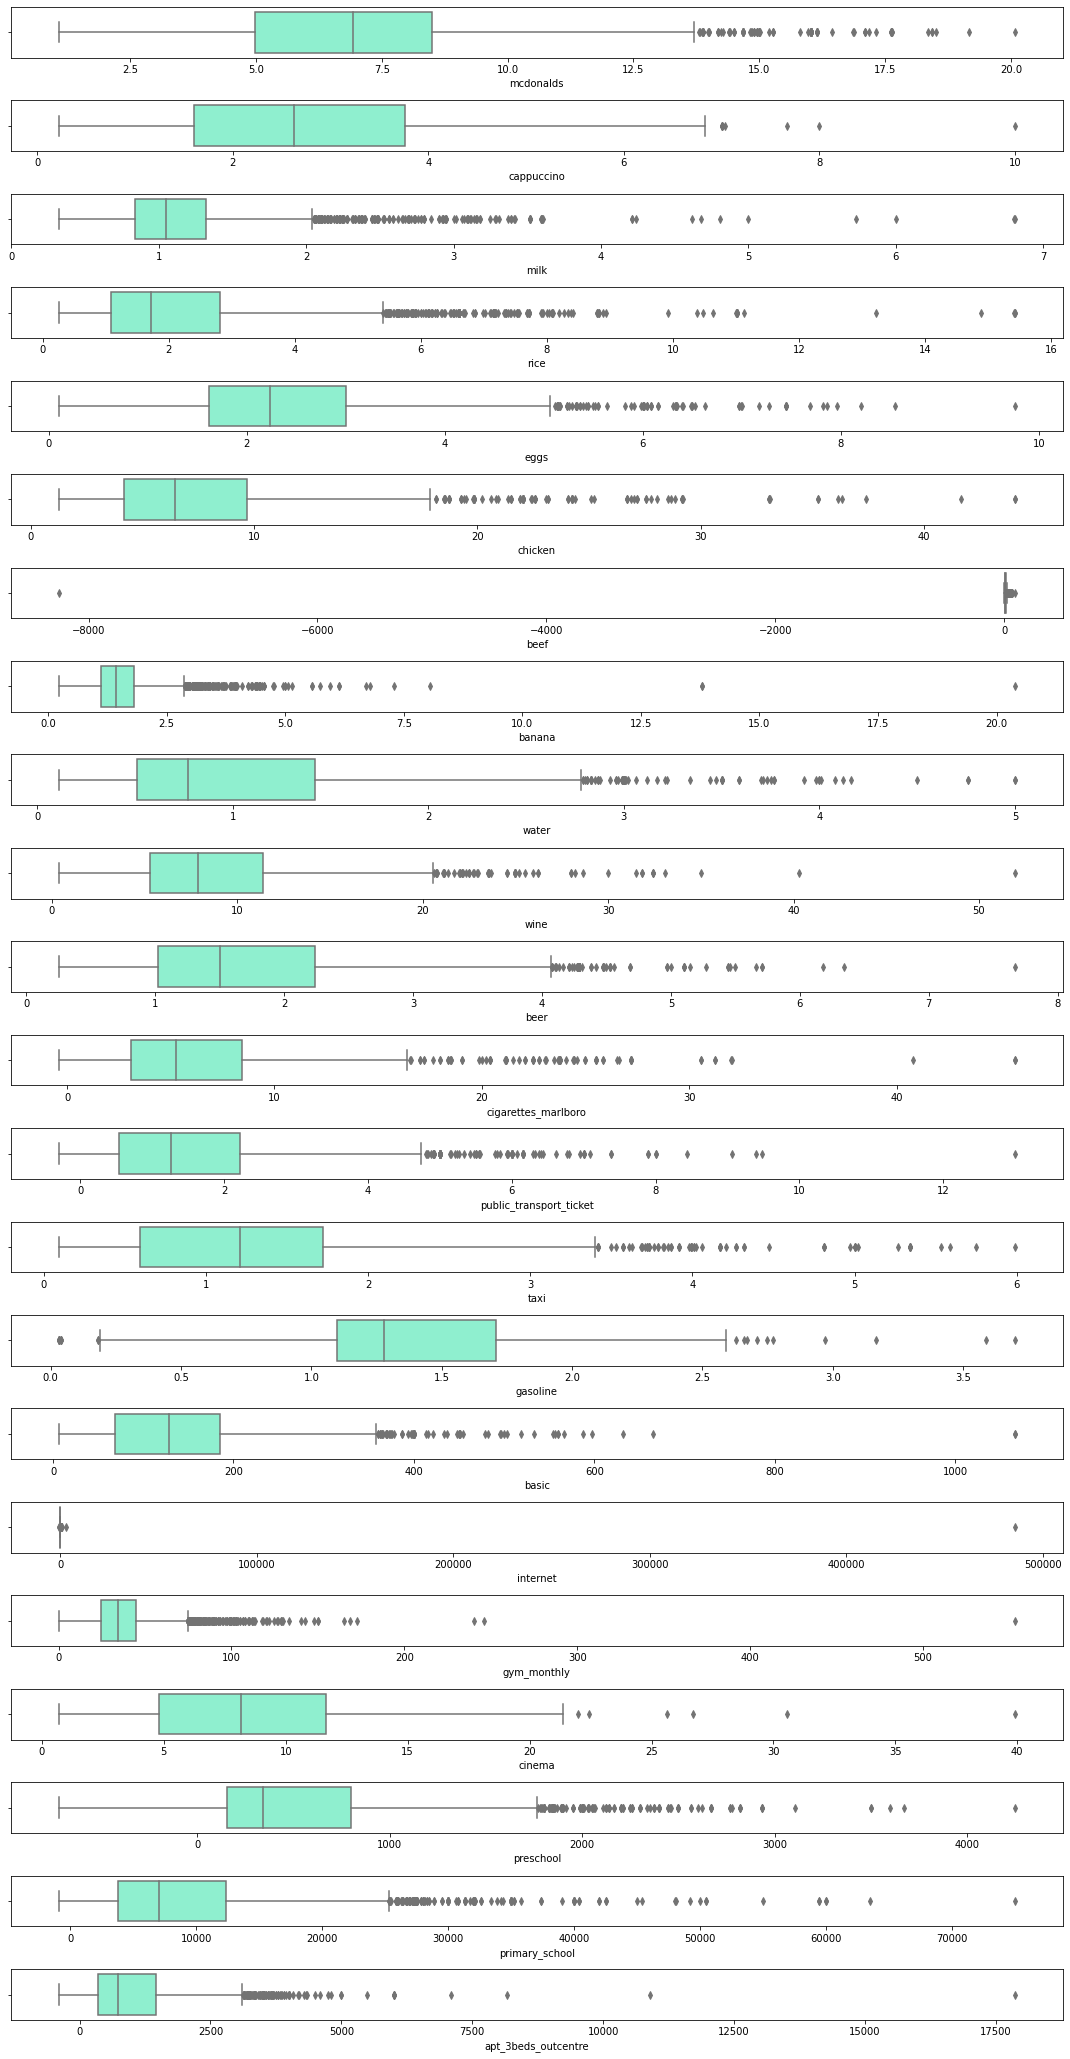

In [28]:
fig, axes = plt.subplots(23, figsize=(15,30))

axes = axes.flat

for indice, columna in enumerate(numericas_final.columns):
    sns.boxplot(x = numericas_final[columna], data = df, ax=axes[indice], color = "aquamarine"); 

    
plt.tight_layout()
fig.delaxes(axes[indice])
plt.show()

Con los boxplot observamos que muchas de nuestras variables tienen outliers, por lo que vamos a ver cómo son estos con mayor detenimiento.

In [31]:
# Obtenemos los index de los outliers para todas las columnas numéricas:
lista_columnas = list(numericas_final.columns)
ind = fun.detectar_outliers(lista_columnas, numericas_final)

In [38]:
df_index = df_final.reset_index()

In [47]:
(df_index[df_index['index'].isin(ind['basic'])]).sample(5)

,index,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
3893,3893,La Porte,United States,9.000000,5.500000,0.760000,3.836202,1.390000,9.631557,13.884140,2.180000,1.747280,12.037646,3.000000,7.750000,3.250000,1.404352,1.474310,396.55,55.500000,34.415944,8.500000,694.181313,13615.689931,1200.00,2916.67
2499,2499,Ra`ananna,Israel,15.270000,3.620000,1.920000,2.840000,3.900000,11.100000,16.150000,2.640000,1.250000,10.280000,2.250000,10.280000,1.750000,1.610000,2.050000,433.05,28.330000,77.070000,12.040000,990.880000,14933.319847,1712.64,3214.87
4051,4051,Bad Honnef am Rhein,Germany,8.637927,3.731625,1.480000,0.990000,2.480000,5.080000,7.380000,3.050000,1.530000,10.540000,1.739917,9.480000,2.630000,1.579990,1.913587,421.50,458.075341,63.220000,12.640000,526.870000,13422.651196,2002.12,2423.61
3260,3260,Rio Rancho,United States,10.964042,6.500000,1.705906,4.189660,3.866053,13.258103,15.446701,2.473809,1.824694,13.333682,2.367302,8.750000,2.609209,2.146199,1.801228,400.00,367.880700,56.823955,15.000000,823.332222,16371.511579,1500.00,2537.00
1373,1373,Goma,Congo,10.000000,3.171192,1.500000,1.600000,1.680000,6.250000,13.549938,2.000000,0.700000,15.000000,2.000000,6.856383,1.348833,2.000000,1.000000,400.00,50.000000,48.978506,9.000454,296.233169,8616.999915,500.00,500.00


In [51]:
(df_index[df_index['index'].isin(ind['monthly_salary'])]).sample(5)

,index,city,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
4073,4073,Bainbridge Island,United States,9.65,5.28,0.790000,2.14,1.650000,10.750000,8.050000,1.41,2.33,12.50,3.160000,8.80,2.000000,1.550000,1.380000,225.00,68.00,72.000000,15.75,1350.000000,14400.000000,3200.000000,9000.00
2909,2909,Dubendorf,Switzerland,13.89,4.95,1.710000,2.27,6.340000,26.710000,66.960000,3.05,1.53,9.62,2.240000,8.76,3.310000,2.560000,1.980000,248.81,52.89,51.050000,20.30,1952.890000,21369.010000,2297.170000,7051.77
2412,2412,Germantown,United States,8.50,4.00,0.427773,2.32,3.030878,10.432439,17.289517,1.22,0.55,7.75,1.772101,7.75,3.250781,1.958592,1.220000,170.38,72.50,41.286863,13.25,1100.000000,17017.974016,2504.590847,7291.67
3401,3401,Conway,United States,8.75,3.50,0.371984,3.31,3.474931,12.494237,16.996970,2.29,2.00,4.00,2.088446,9.00,3.168275,1.682191,1.328728,125.00,85.00,50.000000,8.00,1617.963323,19429.563006,3136.455842,8023.23
3334,3334,Redwood City,United States,9.00,5.17,1.160000,5.87,4.140000,22.050000,19.820000,2.32,2.00,14.50,2.875070,9.45,7.000000,1.240000,1.670000,141.67,62.33,49.990000,14.50,2166.670000,27273.658112,4500.000000,7186.00


Al ver en detenimiento el nombre de los paises con outliers en diferentes precios de productos, valoramos que se tratan de datos coherentes (ej. aparece repetidamente EEUU o Suiza) y por tanto decidimos mantenerlos.